In [1]:
import pandas as pd
import matplotlib.pyplot as plt

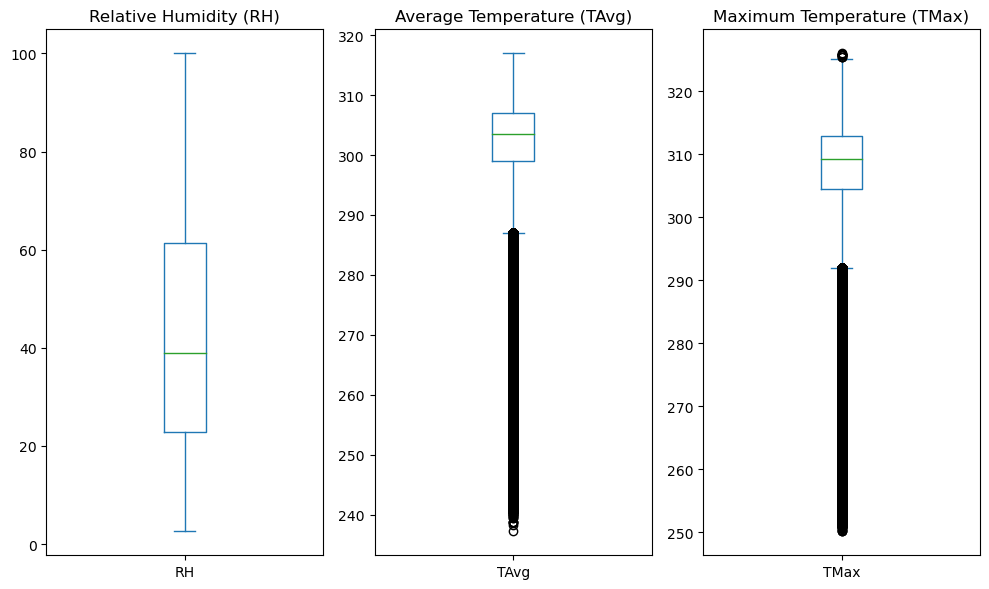

In [2]:
data = pd.read_csv("till2018_final_wh.csv")

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
data['RH'].plot(kind='box')
plt.title('Relative Humidity (RH)')

plt.subplot(1, 3, 2)
data['TAvg'].plot(kind='box')
plt.title('Average Temperature (TAvg)')

plt.subplot(1, 3, 3)
data['TMax'].plot(kind='box')
plt.title('Maximum Temperature (TMax)')

plt.tight_layout()
plt.show()

In [3]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_RH = detect_outliers(data, 'RH')
outliers_TAvg = detect_outliers(data, 'TAvg')
outliers_TMax = detect_outliers(data, 'TMax')

print("Outliers in RH:")
print(outliers_RH)
print("\nOutliers in TAvg:")
print(outliers_TAvg)
print("\nOutliers in TMax:")
print(outliers_TMax)

Outliers in RH:
Empty DataFrame
Columns: [time, lat, lon, RH, TAvg, TMax]
Index: []

Outliers in TAvg:
           time    lat    lon         RH       TAvg       TMax
320         9.0  36.00  72.75  90.729400  262.28357  266.66300
352         9.0  36.25  73.00  87.879400  262.87357  267.85300
353         9.0  36.00  73.00  91.604400  262.08606  266.04300
397         9.0  36.50  73.25  87.654400  262.17856  267.25300
398         9.0  36.25  73.25  86.729400  262.33606  267.65298
...         ...    ...    ...        ...        ...        ...
5669560  2913.0  28.50  96.75  98.600510  285.31363  287.07144
5669564  2913.0  28.25  97.00  93.075516  285.21362  287.97144
5669565  2913.0  28.00  97.00  96.600510  284.48862  285.97144
5669567  2913.0  28.25  97.25  95.925514  281.83862  284.37143
5669568  2913.0  28.00  97.25  99.475510  279.46362  280.37143

[576570 rows x 6 columns]

Outliers in TMax:
           time    lat    lon         RH       TAvg       TMax
320         9.0  36.00  72.75  9

In [4]:
Q1_RH = data['RH'].quantile(0.25)
Q3_RH = data['RH'].quantile(0.75)
IQR_RH = Q3_RH - Q1_RH
data = data[~((data['RH'] < (Q1_RH - 1.5 * IQR_RH)) | (data['RH'] > (Q3_RH + 1.5 * IQR_RH)))]

Q1_TAvg = data['TAvg'].quantile(0.25)
Q3_TAvg = data['TAvg'].quantile(0.75)
IQR_TAvg = Q3_TAvg - Q1_TAvg
data = data[~((data['TAvg'] < (Q1_TAvg - 1.5 * IQR_TAvg)) | (data['TAvg'] > (Q3_TAvg + 1.5 * IQR_TAvg)))]

Q1_TMax = data['TMax'].quantile(0.25)
Q3_TMax = data['TMax'].quantile(0.75)
IQR_TMax = Q3_TMax - Q1_TMax
data = data[~((data['TMax'] < (Q1_TMax - 1.5 * IQR_TMax)) | (data['TMax'] > (Q3_TMax + 1.5 * IQR_TMax)))]

In [5]:
Q1_TAvg = data['TAvg'].quantile(0.25)
Q3_TAvg = data['TAvg'].quantile(0.75)
IQR_TAvg = Q3_TAvg - Q1_TAvg
data = data[~((data['TAvg'] < (Q1_TAvg - 1.5 * IQR_TAvg)) | (data['TAvg'] > (Q3_TAvg + 1.5 * IQR_TAvg)))]

Q1_TMax = data['TMax'].quantile(0.25)
Q3_TMax = data['TMax'].quantile(0.75)
IQR_TMax = Q3_TMax - Q1_TMax
data = data[~((data['TMax'] < (Q1_TMax - 1.5 * IQR_TMax)) | (data['TMax'] > (Q3_TMax + 1.5 * IQR_TMax)))]

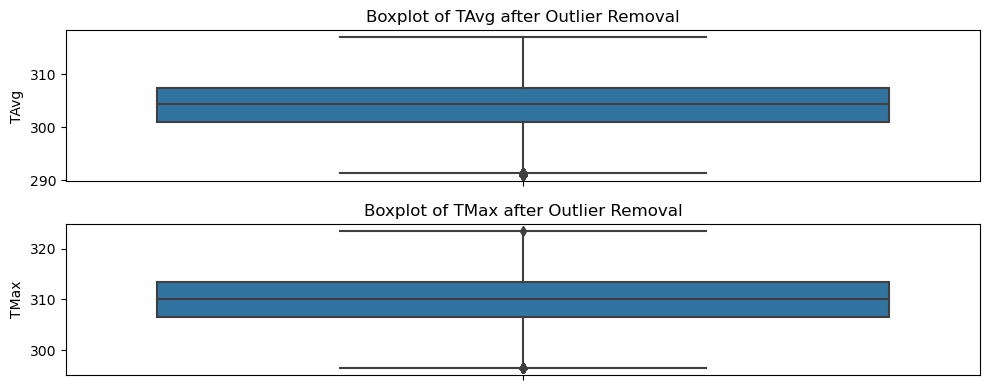

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
sns.boxplot(data=data, y='TAvg')
plt.title('Boxplot of TAvg after Outlier Removal')

plt.subplot(2, 1, 2)
sns.boxplot(data=data, y='TMax')
plt.title('Boxplot of TMax after Outlier Removal')

plt.tight_layout()
plt.show()

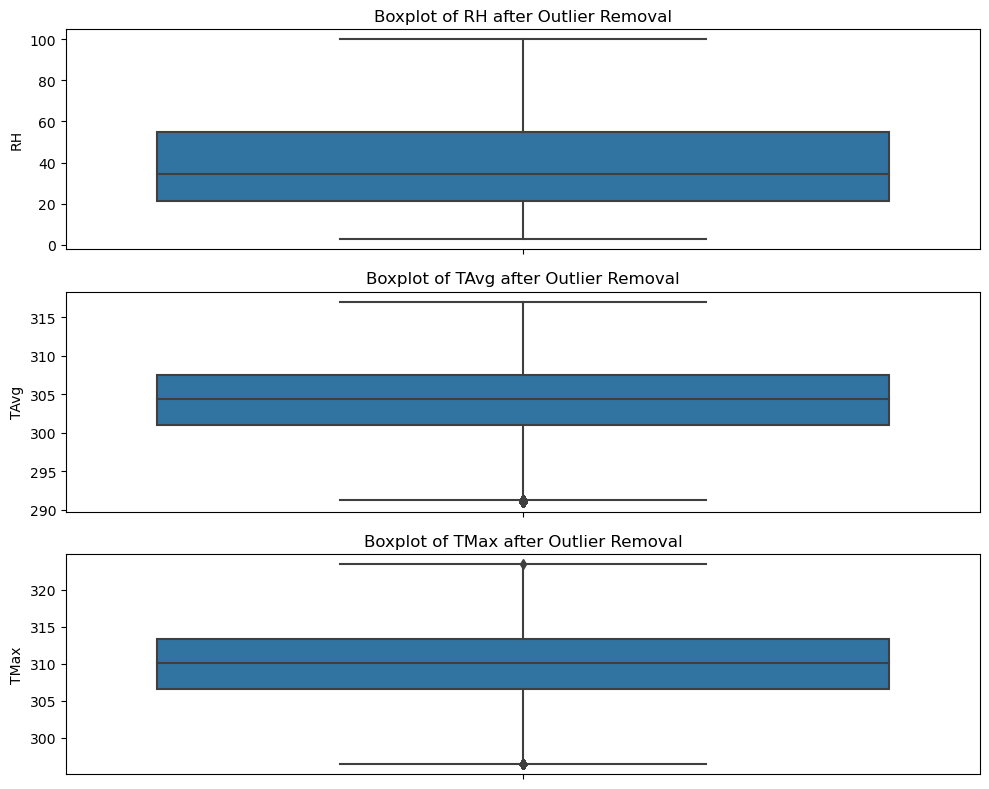

In [9]:
z_scores_RH = (data['RH'] - data['RH'].mean()) / data['RH'].std()
z_scores_TAvg = (data['TAvg'] - data['TAvg'].mean()) / data['TAvg'].std()
z_scores_TMax = (data['TMax'] - data['TMax'].mean()) / data['TMax'].std()

threshold = 3

data_filtered = data[(abs(z_scores_RH) < threshold) & (abs(z_scores_TAvg) < threshold) & (abs(z_scores_TMax) < threshold)]

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
sns.boxplot(data=data_filtered, y='RH')
plt.title('Boxplot of RH after Outlier Removal')

plt.subplot(3, 1, 2)
sns.boxplot(data=data_filtered, y='TAvg')
plt.title('Boxplot of TAvg after Outlier Removal')

plt.subplot(3, 1, 3)
sns.boxplot(data=data_filtered, y='TMax')
plt.title('Boxplot of TMax after Outlier Removal')

plt.tight_layout()
plt.show()

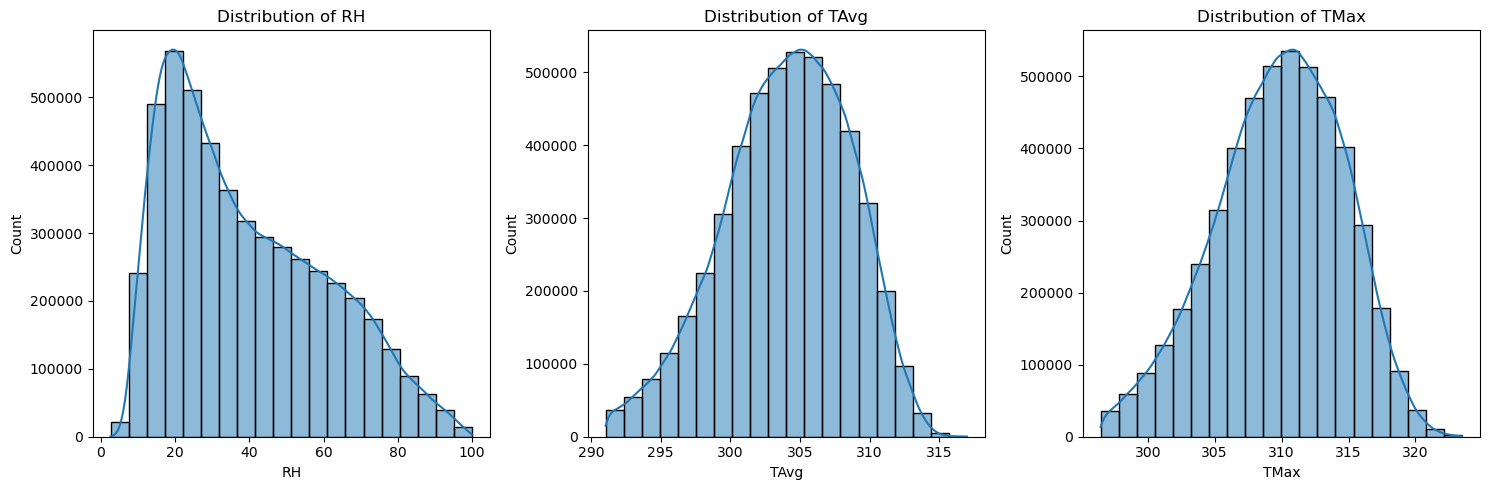

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data_filtered['RH'], bins=20, kde=True)
plt.title('Distribution of RH')

plt.subplot(1, 3, 2)
sns.histplot(data_filtered['TAvg'], bins=20, kde=True)
plt.title('Distribution of TAvg')

plt.subplot(1, 3, 3)
sns.histplot(data_filtered['TMax'], bins=20, kde=True)
plt.title('Distribution of TMax')

plt.tight_layout()
plt.show()

In [12]:
class_counts_RH = data_filtered['RH'].value_counts()
class_counts_TAvg = data_filtered['TAvg'].value_counts()
class_counts_TMax = data_filtered['TMax'].value_counts()

print("Class frequencies for RH:")
print(class_counts_RH)

print("\nClass frequencies for TAvg:")
print(class_counts_TAvg)

print("\nClass frequencies for TMax:")
print(class_counts_TMax)

Class frequencies for RH:
RH
16.625000    166
18.350000    163
17.075000    162
19.525000    160
18.600000    160
            ... 
42.127980      1
44.652980      1
44.202980      1
43.802982      1
99.250510      1
Name: count, Length: 2125395, dtype: int64

Class frequencies for TAvg:
TAvg
304.90512    86
306.18300    83
305.07532    83
306.40512    83
305.78302    81
             ..
292.34900     1
291.65900     1
291.18650     1
292.01650     1
296.27365     1
Name: count, Length: 595327, dtype: int64

Class frequencies for TMax:
TMax
310.80000    2257
311.80000    2210
311.30000    2190
309.80000    2130
309.30000    2109
             ... 
312.73570       1
311.92570       1
311.68567       1
308.94583       1
298.57037       1
Name: count, Length: 323563, dtype: int64


In [13]:
ratio_RH = class_counts_RH.max() / class_counts_RH.min()
ratio_TAvg = class_counts_TAvg.max() / class_counts_TAvg.min()
ratio_TMax = class_counts_TMax.max() / class_counts_TMax.min()

print("Ratio of instances between the most frequent and least frequent classes:")
print("RH:", ratio_RH)
print("TAvg:", ratio_TAvg)
print("TMax:", ratio_TMax)

Ratio of instances between the most frequent and least frequent classes:
RH: 166.0
TAvg: 86.0
TMax: 2257.0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data[['time', 'lat', 'lon']]  
y = data[['RH', 'TAvg', 'TMax']] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_regressor = LinearRegression()


lr_regressor.fit(X_train_scaled, y_train)

y_pred = lr_regressor.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) score:", r2)

Linear Regression Metrics:
Mean Absolute Error (MAE): 7.170521036164121
Mean Squared Error (MSE): 117.89339377041932
R-squared (R^2) score: 0.1634044292437099


In [16]:
import pandas as pd

comparison_lr = pd.DataFrame({
    'Actual_RH': y_test['RH'],
    'Predicted_RH': lr_regressor.predict(X_test_scaled)[:, 0],  # Predicted values for 'RH'
    'Actual_TAvg': y_test['TAvg'],
    'Predicted_TAvg': lr_regressor.predict(X_test_scaled)[:, 1],  # Predicted values for 'TAvg'
    'Actual_TMax': y_test['TMax'],
    'Predicted_TMax': lr_regressor.predict(X_test_scaled)[:, 2]   # Predicted values for 'TMax'
})

print(comparison_lr.head())

         Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
425466   26.809795     37.555361    309.09485      305.074348    313.46848   
3070447  20.650000     32.826138    307.76517      304.829905    312.15518   
4787273  38.341610     46.243937    304.50403      304.107459    310.81586   
903348   10.554046     30.105638    310.40173      305.366137    314.65118   
4183876  14.302249     27.678137    308.79147      304.234547    313.98100   

         Predicted_TMax  
425466       310.484303  
3070447      310.155760  
4787273      309.345724  
903348       310.686127  
4183876      310.312816  


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

y_pred_rf = rf_regressor.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R^2) score:", r2_rf)

Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 3.8405967170174375
Mean Squared Error (MSE): 40.5292106130991
R-squared (R^2) score: 0.7510253266408992


In [18]:
import numpy as np
import pandas as pd

input_data = [
    [9.0, 23.75, 68.5],
    [9.0, 24.25, 68.75],
    [9.0, 24.0, 68.75],
    [9.0, 23.75, 68.75],
    [9.0, 23.5, 68.75],
    [9.0, 24.25, 69.0],
    [9.0, 24.0, 69.0],
    [9.0, 23.75, 69.0],
] 

actual_values = [
    [60.454403, 299.90607, 301.793],
    [34.704403, 302.90106, 308.203],
    [56.854404, 300.41357, 303.08298],
    [47.079403, 301.22107, 304.64297],
    [43.929405, 301.48355, 305.15298],
    [34.104404, 302.95355, 308.413],
    [56.629406, 300.43607, 303.293],
    [49.879406, 301.01108, 304.533],
]

input_data_array = np.array(input_data)
actual_values_array = np.array(actual_values)

new_data_scaled = scaler.transform(input_data_array)[:, :3]  # Assuming 'scaler' is the StandardScaler object used for scaling during training

predictions = rf_regressor.predict(new_data_scaled)

comparison_rf_new_data = pd.DataFrame({
    'Actual_RH': actual_values_array[:, 0],
    'Predicted_RH': predictions[:, 0],
    'Actual_TAvg': actual_values_array[:, 1],
    'Predicted_TAvg': predictions[:, 1],
    'Actual_TMax': actual_values_array[:, 2],
    'Predicted_TMax': predictions[:, 2]
})

print(comparison_rf_new_data)

   Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
0  60.454403     50.916601    299.90607      298.046602    301.79300   
1  34.704403     34.273579    302.90106      299.462229    308.20300   
2  56.854404     50.173177    300.41357      298.827054    303.08298   
3  47.079403     44.713251    301.22107      298.720285    304.64297   
4  43.929405     37.320431    301.48355      298.800749    305.15298   
5  34.104404     32.945884    302.95355      300.367331    308.41300   
6  56.629406     52.835301    300.43607      298.381252    303.29300   
7  49.879406     48.927341    301.01108      297.951604    304.53300   

   Predicted_TMax  
0      299.997083  
1      303.980314  
2      301.034062  
3      301.864576  
4      302.420543  
5      305.066015  
6      300.473101  
7      300.709813  


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import numpy as np
import pandas as pd

input_data = [
    [9.0, 23.75, 69.0],
    [9.0, 23.5, 69.0],
    [9.0, 23.25, 69.0],
    [9.0, 24.25, 69.25],
    [9.0, 24.0, 69.25],
    [9.0, 23.75, 69.25],
    [9.0, 23.5, 69.25],
    [9.0, 23.25, 69.25],
    [9.0, 23.0, 69.25],
    [9.0, 22.25, 69.25],
    [9.0, 27.0, 69.5]
] 

actual_values = [
    [49.879406, 301.01108, 304.533],
    [39.079403, 301.97107, 306.723],
    [39.379406, 301.77856, 306.11298],
    [34.079403, 302.96857, 308.52298],
    [56.704403, 300.49606, 303.443],
    [50.729404, 301.07605, 304.783],
    [35.204403, 302.39856, 307.973],
    [33.754406, 302.19858, 307.55298],
    [37.229404, 301.72107, 305.55298],
    [51.529404, 300.65857, 302.67783],
    [19.479404, 302.72858, 309.283]
]

input_data_array = np.array(input_data)
actual_values_array = np.array(actual_values)

new_data_scaled = scaler.transform(input_data_array)[:, :3]  # Assuming 'scaler' is the StandardScaler object used for scaling during training

predictions = rf_regressor.predict(new_data_scaled)

comparison_rf_new_data = pd.DataFrame({
    'Actual_RH': actual_values_array[:, 0],
    'Predicted_RH': predictions[:, 0],
    'Actual_TAvg': actual_values_array[:, 1],
    'Predicted_TAvg': predictions[:, 1],
    'Actual_TMax': actual_values_array[:, 2],
    'Predicted_TMax': predictions[:, 2]
})

print(comparison_rf_new_data)

    Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
0   49.879406     48.927341    301.01108      297.951604    304.53300   
1   39.079403     40.802941    301.97107      298.902216    306.72300   
2   39.379406     35.653723    301.77856      299.111961    306.11298   
3   34.079403     37.611656    302.96857      298.697213    308.52298   
4   56.704403     55.444074    300.49606      297.404429    303.44300   
5   50.729404     47.840411    301.07605      298.678273    304.78300   
6   35.204403     35.472330    302.39856      299.310175    307.97300   
7   33.754406     37.371272    302.19858      298.610346    307.55298   
8   37.229404     42.378391    301.72107      298.245571    305.55298   
9   51.529404     51.242658    300.65857      298.545312    302.67783   
10  19.479404     25.693978    302.72858      298.546885    309.28300   

    Predicted_TMax  
0       300.709813  
1       303.022284  
2       303.341932  
3       303.245693  
4       299.505511

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
import numpy as np
import pandas as pd

input_data = [
    [9.0,22.0,69.5],
    [273.0,24.0,75.25],
    [1593.0,30.25,80.5],
    [1305.0,12.5,77.25],
] 

actual_values = [
    [35.279404,302.71857,306.3778],
    [12.192763,300.7028,307.3],
    [57.934563,269.6608,275.3042],
    [48.593037,304.57352,310.65033]
]

input_data_array = np.array(input_data)
actual_values_array = np.array(actual_values)

new_data_scaled = scaler.transform(input_data_array)[:, :3]  # Assuming 'scaler' is the StandardScaler object used for scaling during training

predictions = rf_regressor.predict(new_data_scaled)

comparison_rf_new_data = pd.DataFrame({
    'Actual_RH': actual_values_array[:, 0],
    'Predicted_RH': predictions[:, 0],
    'Actual_TAvg': actual_values_array[:, 1],
    'Predicted_TAvg': predictions[:, 1],
    'Actual_TMax': actual_values_array[:, 2],
    'Predicted_TMax': predictions[:, 2]
})

print(comparison_rf_new_data)

   Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
0  35.279404     40.784293    302.71857      299.459598    306.37780   
1  12.192763     19.195952    300.70280      298.798869    307.30000   
2  57.934563     32.372718    269.66080      292.837888    275.30420   
3  48.593037     51.057511    304.57352      303.356877    310.65033   

   Predicted_TMax  
0      302.996717  
1      304.088871  
2      301.460877  
3      310.506127  


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
import numpy as np
import pandas as pd

input_data = [
    [9.0,22.0,69.5],
    [273.0,24.0,75.25],
    [1593.0,30.25,80.5],
    [1305.0,12.5,77.25],
] 

actual_values = [
    [35.279404,302.71857,306.3778],
    [12.192763,300.7028,307.3],
    [57.934563,269.6608,275.3042],
    [48.593037,304.57352,310.65033]
]

input_data_array = np.array(input_data)
actual_values_array = np.array(actual_values)

new_data_scaled = scaler.transform(input_data_array)[:, :3]  # Assuming 'scaler' is the StandardScaler object used for scaling during training

predictions = lr_regressor.predict(new_data_scaled)

comparison_lr_new_data = pd.DataFrame({
    'Actual_RH': actual_values_array[:, 0],
    'Predicted_RH': predictions[:, 0],
    'Actual_TAvg': actual_values_array[:, 1],
    'Predicted_TAvg': predictions[:, 1],
    'Actual_TMax': actual_values_array[:, 2],
    'Predicted_TMax': predictions[:, 2]
})

print(comparison_lr_new_data)

   Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
0  35.279404     21.060697    302.71857      304.907646    306.37780   
1  12.192763     26.544367    300.70280      304.041639    307.30000   
2  57.934563     27.616464    269.66080      304.513790    275.30420   
3  48.593037     52.219349    304.57352      303.652095    310.65033   

   Predicted_TMax  
0      310.148599  
1      309.879714  
2      310.643859  
3      308.943946  


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

X = data[['time', 'lat', 'lon']]  
y = data[['RH', 'TAvg', 'TMax']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3)  # 3 output neurons for RH, TAvg, and TMax
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) score:", r2)




Epoch 1/50

99265/99265 [==============================] - 115s 1ms/step - loss: 213.2966 - val_loss: 46.3457
Epoch 2/50
99265/99265 [==============================] - 104s 1ms/step - loss: 45.5158 - val_loss: 44.3162
Epoch 3/50
99265/99265 [==============================] - 147s 1ms/step - loss: 44.3518 - val_loss: 43.4146
Epoch 4/50
99265/99265 [==============================] - 121s 1ms/step - loss: 43.3150 - val_loss: 42.2852
Epoch 5/50
99265/99265 [==============================] - 109s 1ms/step - loss: 42.5431 - val_loss: 41.9453
Epoch 6/50
99265/99265 [==============================] - 116s 1ms/step - loss: 42.1155 - val_loss: 42.1826
Epoch 7/50
99265/99265 [==============================] - 95s 960us/step - loss: 41.5729 - val_loss: 41.8493
Epoch 8/50
99265/99265 [==============================] - 109s 1ms/step - loss: 41.1734 - val_loss: 40.3060
Epoch 9/50
99265/99265 [==============================] - 111s 1ms/step - loss: 40.8841 - val_loss: 40.3609
Epoch 10/50
99265/9926

In [23]:
comparison_nn = pd.DataFrame({
    'Actual_RH': y_test['RH'],
    'Predicted_RH': y_pred[:, 0],
    'Actual_TAvg': y_test['TAvg'],
    'Predicted_TAvg': y_pred[:, 1],
    'Actual_TMax': y_test['TMax'],
    'Predicted_TMax': y_pred[:, 2]
})

print(comparison_nn)

         Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
425466   26.809795     22.683729    309.09485      309.617065    313.46848   
3070447  20.650000     22.594023    307.76517      305.792236    312.15518   
4787273  38.341610     39.238953    304.50403      304.448700    310.81586   
903348   10.554046     17.155592    310.40173      309.033142    314.65118   
4183876  14.302249     20.918591    308.79147      304.002563    313.98100   
...            ...           ...          ...             ...          ...   
4323272  67.141960     55.031555    300.28990      304.605621    305.16116   
223465    6.706960     23.896290    307.67040      306.272369    314.10880   
1487427  25.520672     27.587551    307.67474      307.285034    315.31708   
4203074  60.215626     57.405224    305.76572      304.050232    312.51030   
2745657  50.405212     31.479242    305.69772      309.205444    308.93756   

         Predicted_TMax  
425466       315.481476  
3070447    

In [25]:
input_data = [[9.0, 24.0, 68.5]]

input_data_scaled = scaler.transform(input_data)

lr_predictions = lr_regressor.predict(input_data_scaled)
rf_predictions = rf_regressor.predict(input_data_scaled)
nn_predictions = model.predict(input_data_scaled)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network'],
    'Predicted_RH': [lr_predictions[0][0], rf_predictions[0][0], nn_predictions[0][0]],
    'Predicted_TAvg': [lr_predictions[0][1], rf_predictions[0][1], nn_predictions[0][1]],
    'Predicted_TMax': [lr_predictions[0][2], rf_predictions[0][2], nn_predictions[0][2]],
    'Actual_RH': [59.729404, None, None],  # Replace None with your actual values
    'Actual_TAvg': [300.12357, None, None], # Replace None with your actual values
    'Actual_TMax': [302.443, None, None]  # Replace None with your actual values
})
print(comparison_df)

1/1 [==============================] - 0s 20ms/step
               Model  Predicted_RH  Predicted_TAvg  Predicted_TMax  Actual_RH  \
0  Linear Regression     16.280368      305.271937      310.470021  59.729404   
1      Random Forest     53.747005      296.638132      298.546821        NaN   
2     Neural Network     50.975105      298.134216      300.639313        NaN   

   Actual_TAvg  Actual_TMax  
0    300.12357      302.443  
1          NaN          NaN  
2          NaN          NaN  


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
input_data = [
    [9.0, 22.0, 69.5],
    [273.0, 24.0, 75.25],
    [1593.0, 30.25, 80.5],
    [1305.0, 12.5, 77.25],
]
input_data_array = np.array(input_data)
new_data_scaled = scaler.transform(input_data_array)[:, :3] 

# Predictions using the trained neural network model
predictions = model.predict(new_data_scaled)

# Assuming 'actual_values' contains the actual values corresponding to 'input_data'
actual_values = [
    [35.279404, 302.71857, 306.3778],
    [12.192763, 300.7028, 307.3],
    [57.934563, 269.6608, 275.3042],
    [48.593037, 304.57352, 310.65033]
]
actual_values_array = np.array(actual_values)

# Create a DataFrame to compare actual and predicted values
comparison_nn_new_data = pd.DataFrame({
    'Actual_RH': actual_values_array[:, 0],
    'Predicted_RH': predictions[:, 0],
    'Actual_TAvg': actual_values_array[:, 1],
    'Predicted_TAvg': predictions[:, 1],
    'Actual_TMax': actual_values_array[:, 2],
    'Predicted_TMax': predictions[:, 2]
})

print(comparison_nn_new_data)

1/1 [==============================] - 0s 31ms/step
   Actual_RH  Predicted_RH  Actual_TAvg  Predicted_TAvg  Actual_TMax  \
0  35.279404     39.390465    302.71857      299.482361    306.37780   
1  12.192763     20.129162    300.70280      299.614838    307.30000   
2  57.934563     30.254230    269.66080      292.920715    275.30420   
3  48.593037     49.276924    304.57352      301.941284    310.65033   

   Predicted_TMax  
0      303.867432  
1      305.178711  
2      300.770355  
3      307.697144  


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
